In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [25]:
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
stock = TimeSeries(key='1250F9WWA3Z77BIK')

In [30]:
nflx = pd.read_csv('netflix_stock_8_30.csv',index_col='Unnamed: 0')
nflx = nflx[(nflx.interval == 5) & (nflx.index > '2018-08-31')]
data_apple, meta_apple = stock.get_intraday(symbol ='AAPL', interval='5min')
apple = pd.DataFrame(data_apple)
apple = pd.DataFrame(apple.T)
apple.index = pd.to_datetime(apple.index)

In [36]:
data_fb, meta_fb = stock.get_intraday(symbol ='FB', interval='5min')
fb = pd.DataFrame(data_fb)
fb = pd.DataFrame(fb.T)
fb.index = pd.to_datetime(fb.index)

In [38]:
apple = apple[(apple.index > '2018-08-31')]
fb = fb[(fb.index > '2018-08-31')]

In [41]:
fb.to_csv('fb_daily_stock.csv')
apple.to_csv('apple_daily_stock.csv')
nflx.to_csv('nflx_daily_stock.csv')

# Candlestick Charts 8-31-2018

In [143]:
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime

layout = {'xaxis': {'rangeslider':{'visible':False}},
    'title': 'Netflix Stock 08-31-2018',
    'yaxis': {'title': 'Stock Price'},'shapes': [{
        'x0': '2018-08-31 14:00:00', 'x1': '2018-08-31 14:00:00',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],'annotations': [{
        'x': '2018-08-31 14:00:00', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Predictions Begin'
    }]}

trace = go.Candlestick(x=nflx.index,
                       open=nflx['1. open'],
                       high=nflx['2. high'],
                       low=nflx['3. low'],
                       close=nflx['4. close'],
                       increasing=dict(line=dict(color= 'Red')),
                       decreasing=dict(line=dict(color= 'Black')))
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='plot from API (18)')

In [142]:
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime

layout = {'xaxis': {'rangeslider':{'visible':False}},
    'title': 'Apple Stock 08-31-2018',
    'yaxis': {'title': 'Stock Price'},'shapes': [{
        'x0': '2018-08-31 14:00:00', 'x1': '2018-08-31 14:00:00',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],'annotations': [{
        'x': '2018-08-31 14:00:00', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Predictions Begin'
    }]}

trace = go.Candlestick(x=nflx.index,
                       open=apple['1. open'],
                       high=apple['2. high'],
                       low=apple['3. low'],
                       close=apple['4. close'],
                       increasing=dict(line=dict(color= 'Black')),
                       decreasing=dict(line=dict(color= 'Silver')))
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='plot from API (16)')

In [129]:
fb.head(1)

1. open   2. high    3. low  4. close 5. volume
2018-08-31 15:55:00   175.74  175.7650  175.6200  175.7200    605603

In [141]:
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime

# ts_close = pd.DataFrame(fb['4. close'])
# ts_close = ts_close['4. close'].astype(float)
# rolmean = ts_close.rolling(window=6).mean()
# orig_close = plt.plot(ts, color='blue',label='Original')
# mean_close = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)


layout = {'xaxis': {'rangeslider':{'visible':False}},
    'title': 'Facebook Stock 08-31-2018',
    'yaxis': {'title': 'Stock Price'},'shapes': [{
        'x0': '2018-08-31 14:00:00', 'x1': '2018-08-31 14:00:00',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],'annotations': [{
        'x': '2018-08-31 14:00:00', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Predictions Begin'
    }]}


trace = go.Candlestick(name = 'Price',x=nflx.index,
                       open=fb['1. open'],
                       high=fb['2. high'],
                       low=fb['3. low'],
                       close=fb['4. close'],
                       increasing=dict(line=dict(color= 'Blue')),
                       decreasing=dict(line=dict(color= 'Silver')))
# trace2 = go.Scatter(name = 'Close Price MA',
#     x = rolmean.index,
#     y = rolmean.values, line = dict(
#         color = ('red'), o))

data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='plot from API (15)')

In [56]:
all_df = pd.read_csv('./csv/fb_netflix_apple.csv', index_col='Unnamed: 0')

# FACEBOOK Time Series

In [287]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import itertools

In [119]:
def plot_ts(df, metric):
    ts = pd.DataFrame(df[metric])
    ts = ts[metric].astype(float)
    rolmean = ts.rolling(window=6).mean()
#     rolstd = ts.rolling(window=6).std()
    orig = plt.plot(ts, color='blue',label='Price')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    clean = re.split("[^a-zA-Z]*", metric)
    title = clean[1].title()
    plt.title(title + ' Price' + ' Rolling Mean')
    plt.show(block=False)

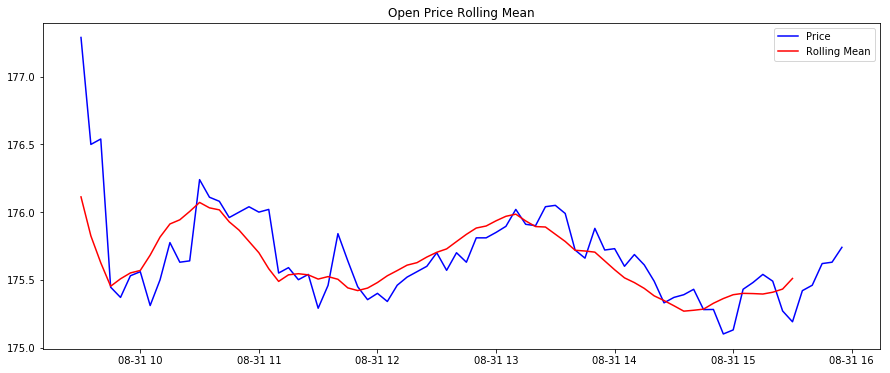

None

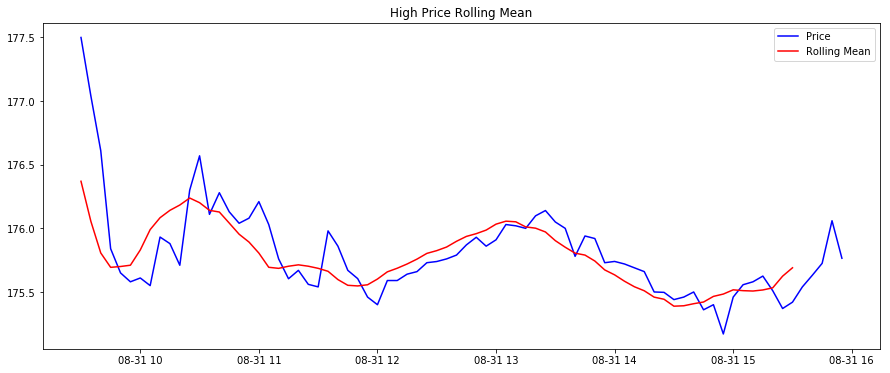

None

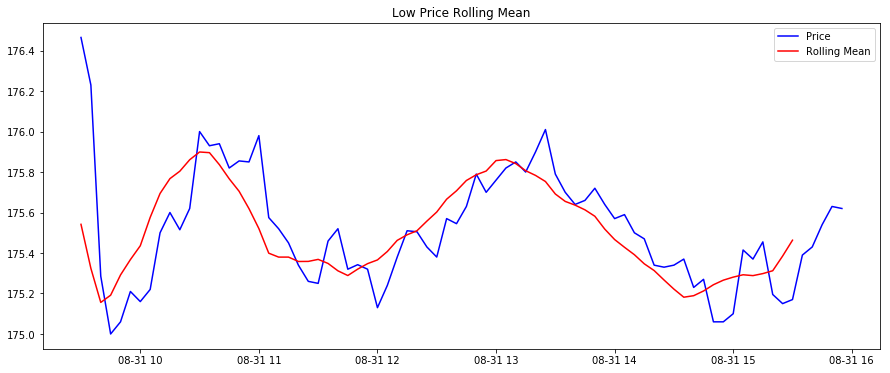

None

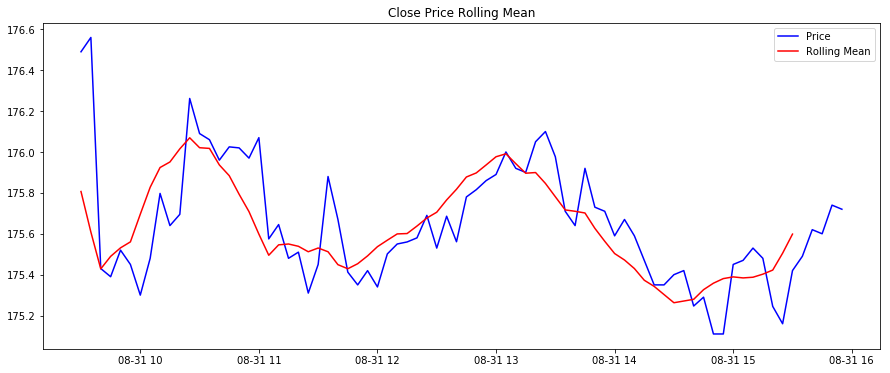

None

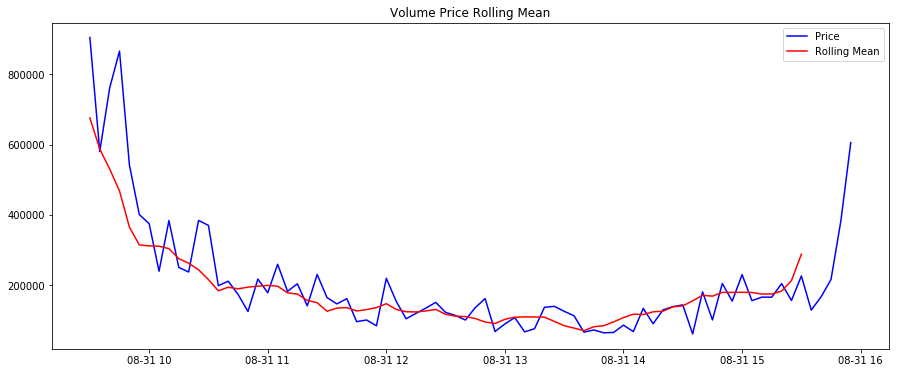

None

In [138]:
display(plot_ts(fb,'1. open'))
display(plot_ts(fb,'2. high'))
display(plot_ts(fb,'3. low'))
display(plot_ts(fb,'4. close'))
display(plot_ts(fb,'5. volume'))

# FACEBOOK Eliminating Seasonality and Trends

In [126]:
fb['1. open'] = fb['1. open'].astype(float)
dftest = adfuller(fb['1. open'], autolag='AIC')

In [137]:
fb.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [149]:
def dicky_fuller(df): 
    for metric in df.columns:
        clean = re.split("[^a-zA-Z]*", metric)
        title = clean[1].title()
        print('Dickey-Fuller Test'+ ' for '+ title + ' Price:')
        df[metric] = df[metric].astype(float)
        dftest = adfuller(df[metric], autolag='AIC')

        # Extract and display test results in a user friendly manner
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

In [150]:
dicky_fuller(fb)

Dickey-Fuller Test for Open Price:
Test Statistic                 -0.198095
p-value                         0.938748
#Lags Used                     11.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64
Dickey-Fuller Test for High Price:
Test Statistic                 -0.122910
p-value                         0.947108
#Lags Used                      9.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64
Dickey-Fuller Test for Low Price:
Test Statistic                 -2.816630
p-value                         0.055937
#Lags Used                      1.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype

In [152]:
def log_compare(df, metric):
    ts = pd.DataFrame(df[metric])
    ts = ts[metric].astype(float)
    ts_log = np.log(ts)
    rolmean = ts.rolling(window=6).mean()
    rolmean_log = ts_log.rolling(window=6).mean()
#     rolstd = ts.rolling(window=6).std()
    orig = plt.plot(ts, color='blue',label='Price')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    clean = re.split("[^a-zA-Z]*", metric)
    title = clean[1].title()
    plt.title(title + ' Price' + ' Rolling Mean')
    plt.show(block=False)
    orig_log = plt.plot(ts_log, color='blue',label='Log Price')
    mean_log = plt.plot(rolmean_log, color='red', label='Log Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Log ' + title + ' Price' + ' Rolling Mean')

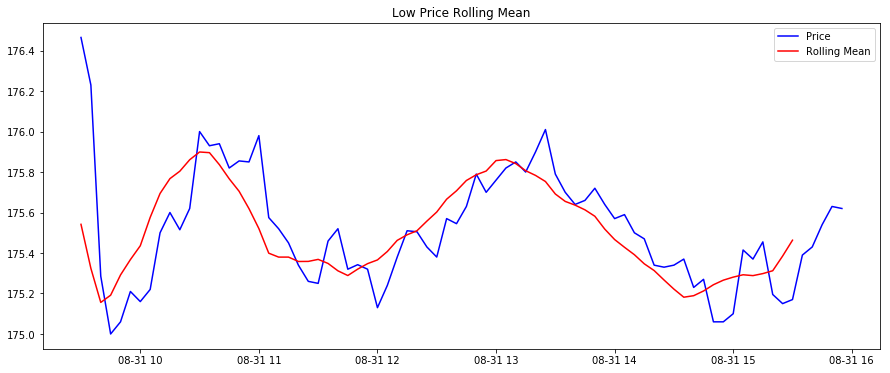

None

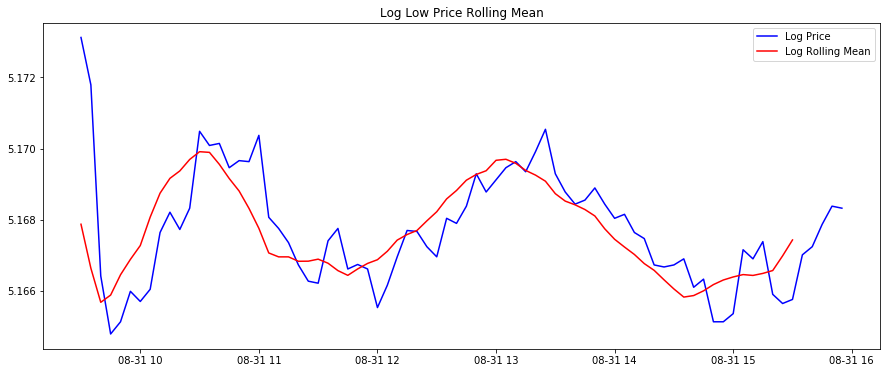

In [160]:
display(log_compare(fb,'3. low'))

In [185]:
def check_stationarity(df, metric):
    plot_ts(df, metric)
    clean = re.split("[^a-zA-Z]*", metric)
    title = clean[1].title()
    print('Dickey-Fuller Test'+ ' for '+ title + ' Price:')
    df[metric] = df[metric].astype(float)
    dftest = adfuller(df[metric], autolag='AIC')

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [177]:
decomposition = seasonal_decompose(ts_log, freq=6)

In [205]:
def plot_decomposition(df, metric):
    clean = re.split("[^a-zA-Z]*", metric)
    title = clean[1].title()
    ts = pd.DataFrame(df[metric])
    ts = ts[metric].astype(float)
    ts_log = np.log(ts)
    decomposition = seasonal_decompose(ts_log, freq=6)

    # Gather the trend, seasonality and noise of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    rcParams['figure.figsize'] = 15, 15
    plt.subplot(411)
    plt.plot(ts_log, label=title +' Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label=title +' Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label=title +' Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label=title +' Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    return residual

In [206]:
fb.head(1)

1. open  2. high  3. low  4. close  5. volume
2018-08-31 15:55:00   175.74  175.765  175.62    175.72   605603.0

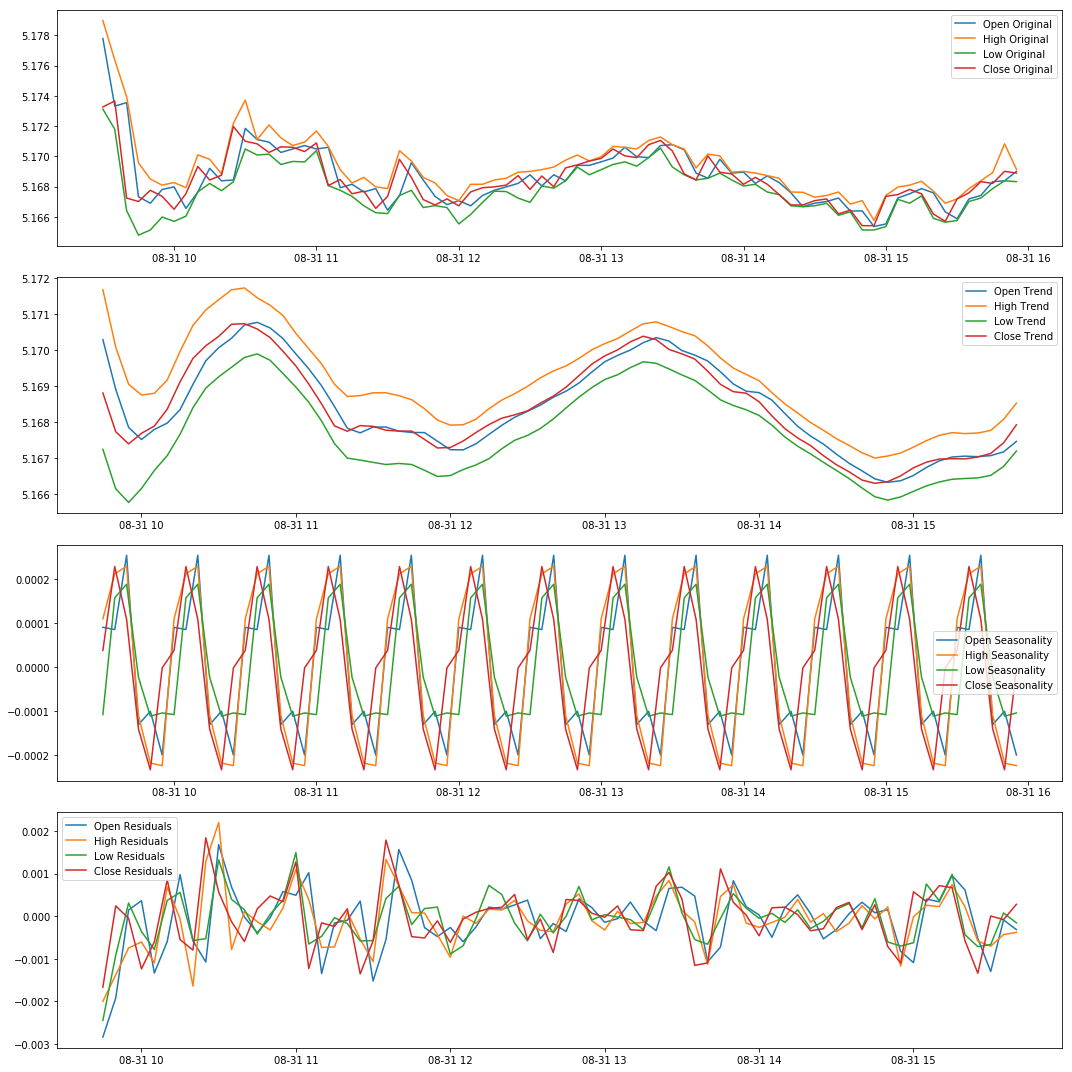

In [207]:
fb_resids_open = plot_decomposition(fb,'1. open')
fb_resids_high = plot_decomposition(fb,'2. high')
fb_resids_low = plot_decomposition(fb,'3. low')
fb_resids_close = plot_decomposition(fb,'4. close')

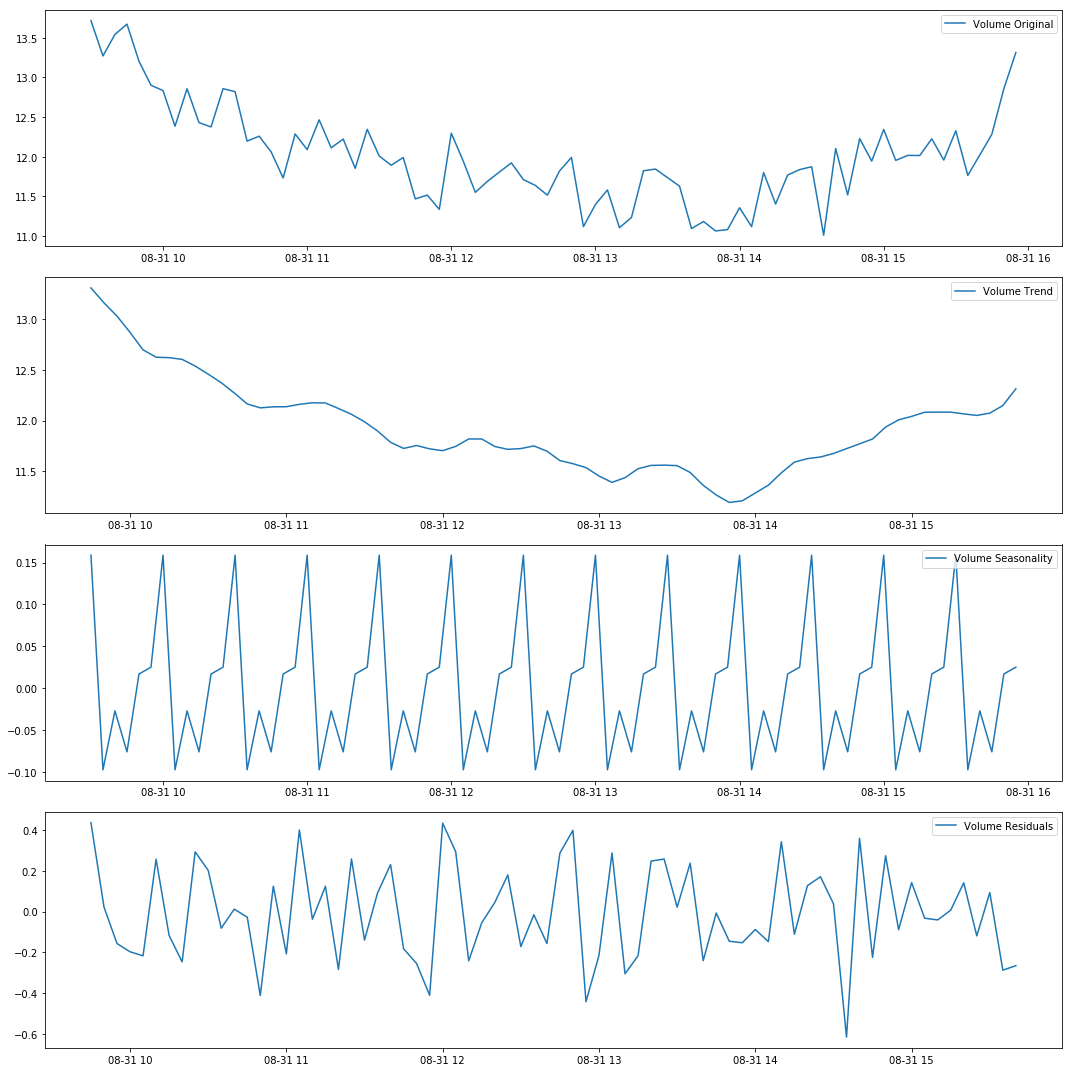

In [213]:
fb_resids_volume = plot_decomposition(fb,'5. volume')

In [214]:
fb.head(1)

1. open  2. high  3. low  4. close  5. volume
2018-08-31 15:55:00   175.74  175.765  175.62    175.72   605603.0

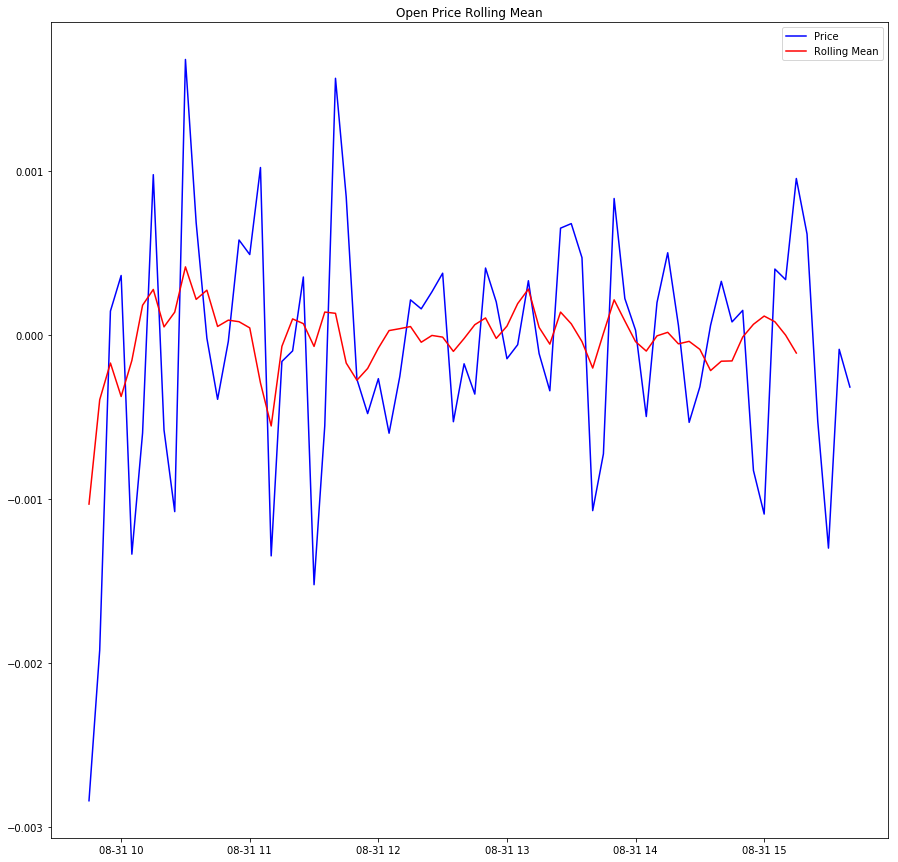

Dickey-Fuller Test for Open Price:
Test Statistic                -7.239200e+00
p-value                        1.903907e-10
#Lags Used                     1.000000e+00
Number of Observations Used    7.000000e+01
Critical Value (1%)           -3.527426e+00
Critical Value (5%)           -2.903811e+00
Critical Value (10%)          -2.589320e+00
dtype: float64


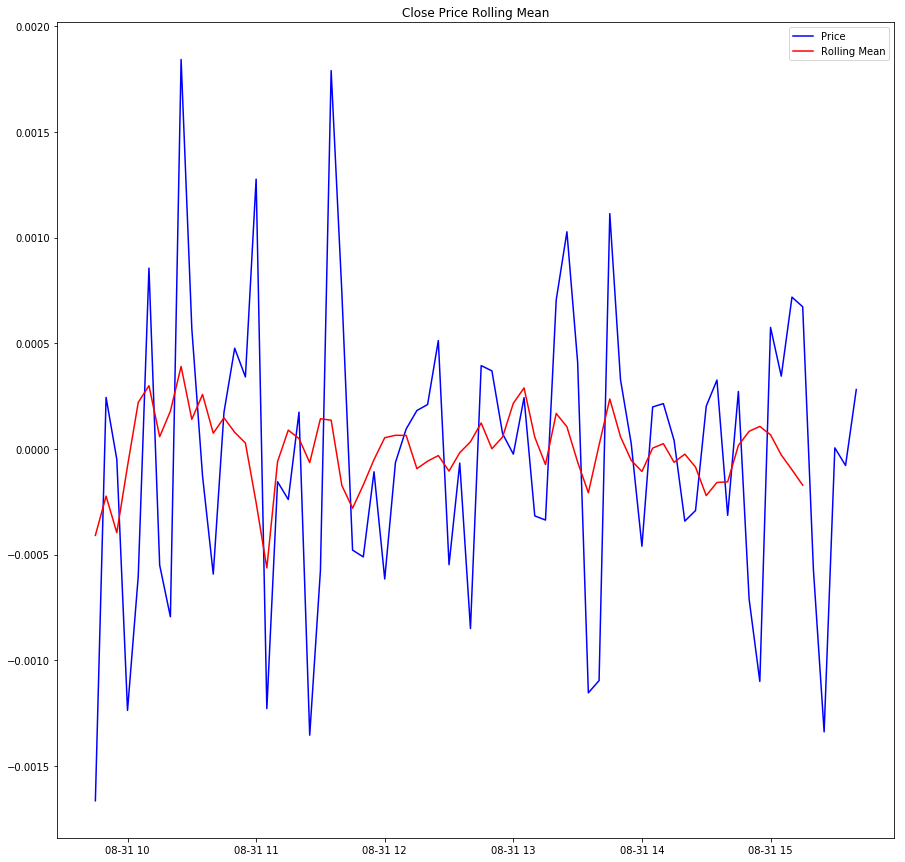

Dickey-Fuller Test for Close Price:
Test Statistic                -8.274487e+00
p-value                        4.696450e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.000000e+01
Critical Value (1%)           -3.527426e+00
Critical Value (5%)           -2.903811e+00
Critical Value (10%)          -2.589320e+00
dtype: float64


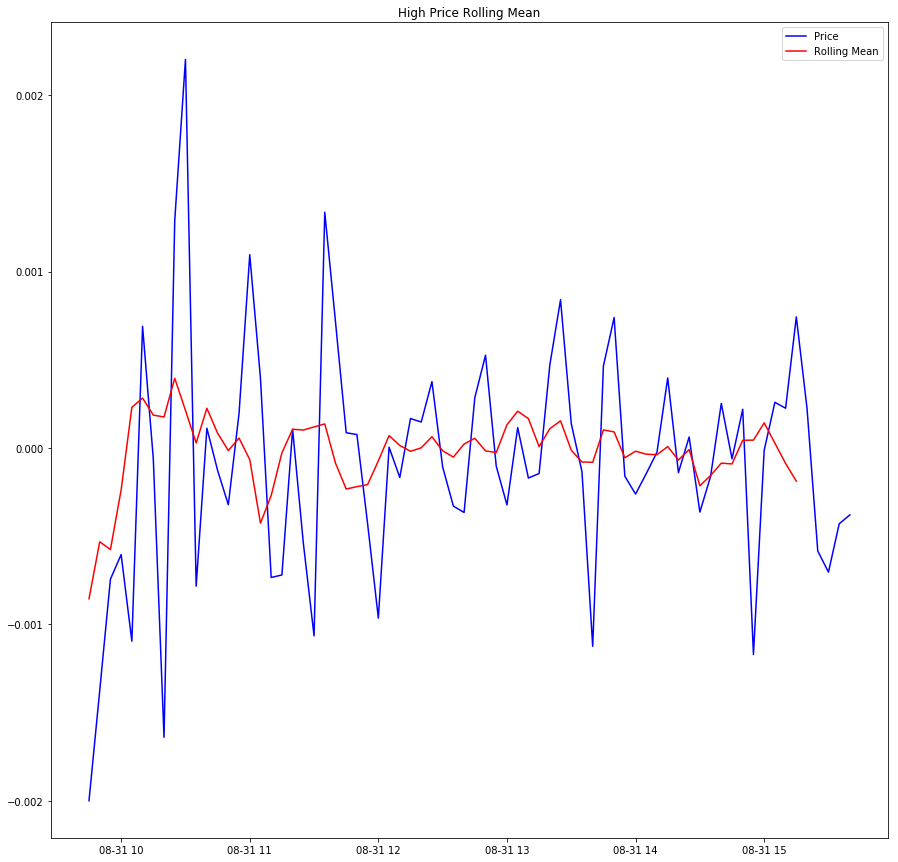

Dickey-Fuller Test for High Price:
Test Statistic                 -4.131870
p-value                         0.000857
#Lags Used                      3.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


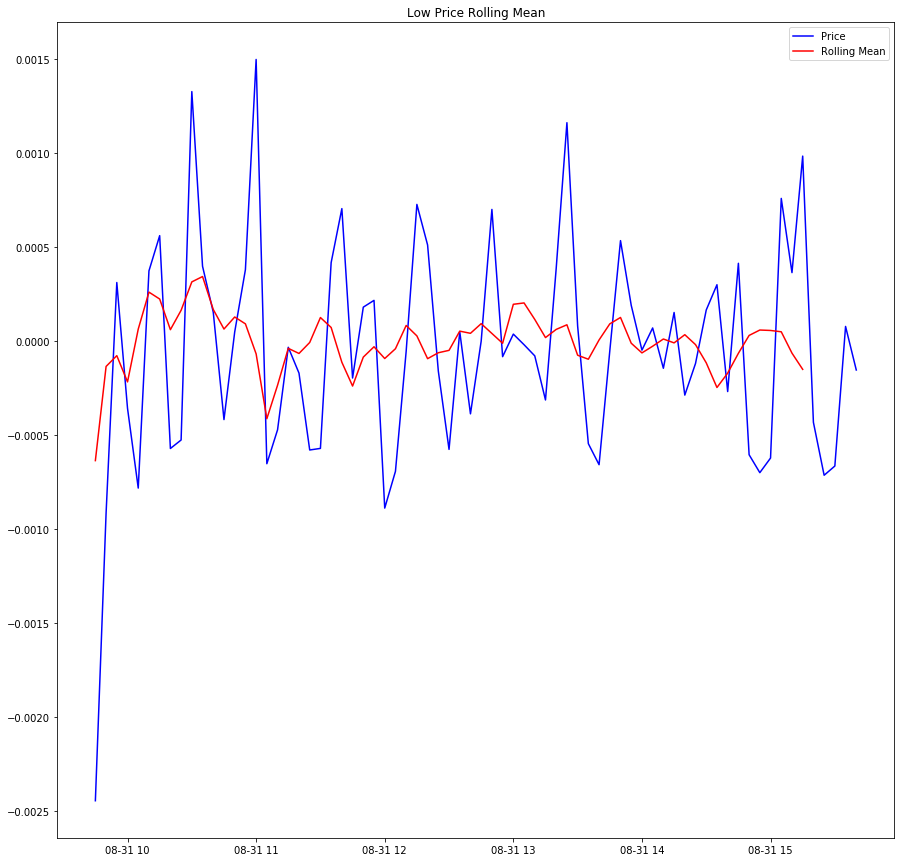

Dickey-Fuller Test for Low Price:
Test Statistic                -6.574161e+00
p-value                        7.800910e-09
#Lags Used                     1.000000e+00
Number of Observations Used    7.000000e+01
Critical Value (1%)           -3.527426e+00
Critical Value (5%)           -2.903811e+00
Critical Value (10%)          -2.589320e+00
dtype: float64


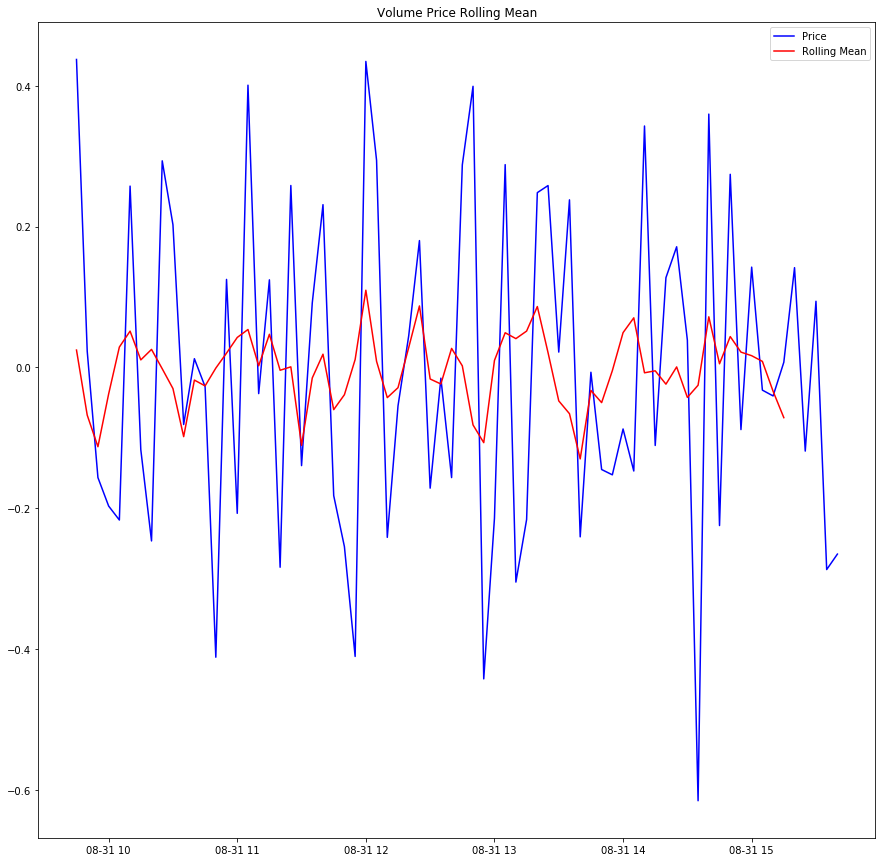

Dickey-Fuller Test for Volume Price:
Test Statistic                -6.325590e+00
p-value                        2.991990e-08
#Lags Used                     7.000000e+00
Number of Observations Used    6.400000e+01
Critical Value (1%)           -3.536928e+00
Critical Value (5%)           -2.907887e+00
Critical Value (10%)          -2.591493e+00
dtype: float64


In [217]:
fb_resids_open.dropna(inplace=True)
fb_resids_open = pd.DataFrame(fb_resids_open)
check_stationarity(fb_resids_open, '1. open')

fb_resids_close.dropna(inplace=True)
fb_resids_close = pd.DataFrame(fb_resids_close)
check_stationarity(fb_resids_close, '4. close')

fb_resids_high.dropna(inplace=True)
fb_resids_high = pd.DataFrame(fb_resids_high)
check_stationarity(fb_resids_high, '2. high')

fb_resids_low.dropna(inplace=True)
fb_resids_low = pd.DataFrame(fb_resids_low)
check_stationarity(fb_resids_low, '3. low')

fb_resids_volume.dropna(inplace=True)
fb_resids_volume = pd.DataFrame(fb_resids_volume)
check_stationarity(fb_resids_volume, '5. volume')

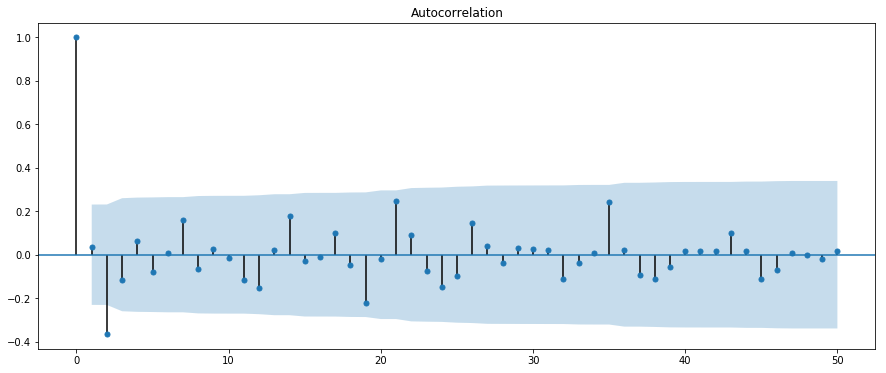

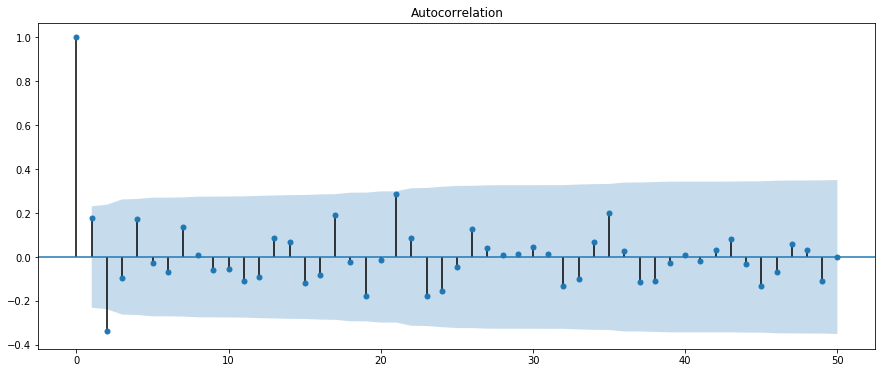

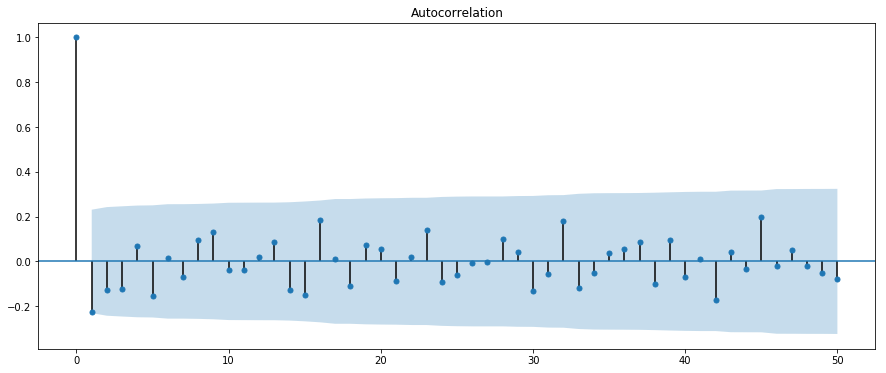

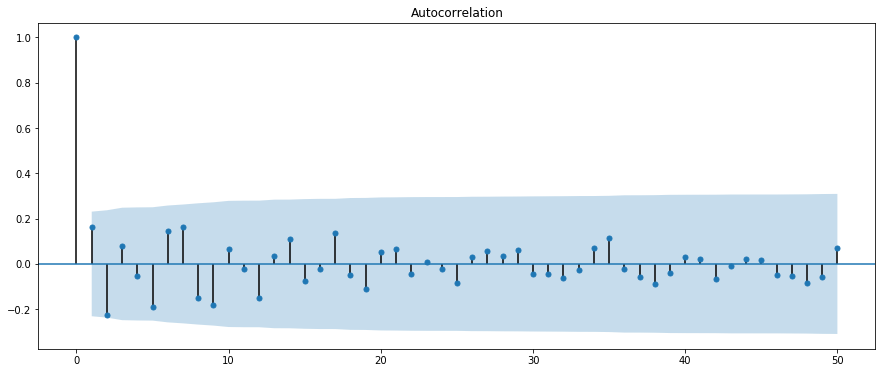

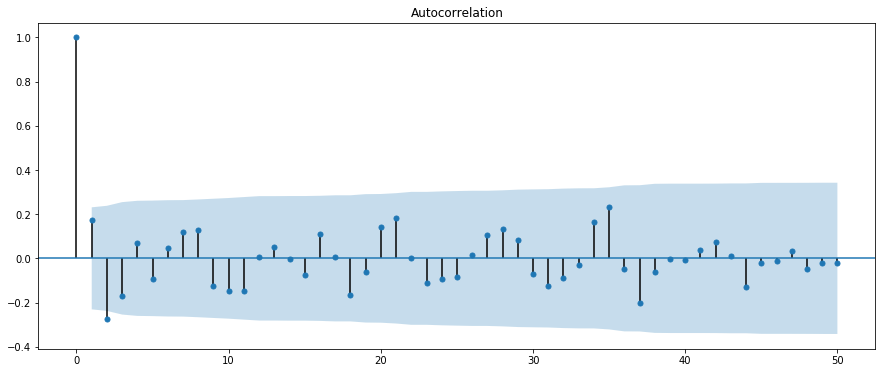

In [251]:
plot_acf(fb_resids_close, lags=50)
plt.show()
plot_acf(fb_resids_open, lags=50)
plt.show()
plot_acf(fb_resids_volume, lags=50)
plt.show()
plot_acf(fb_resids_high, lags=50)
plt.show()
plot_acf(fb_resids_low, lags=50)
plt.show()

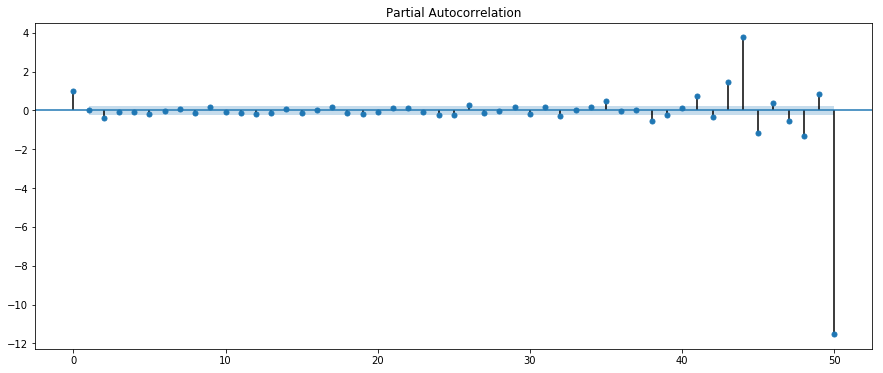

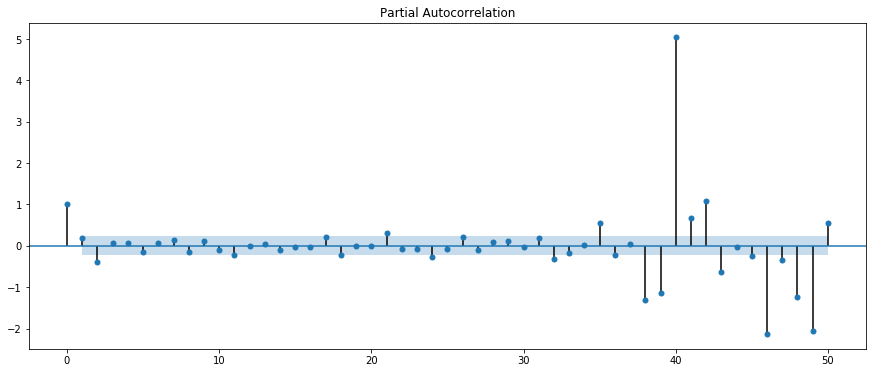

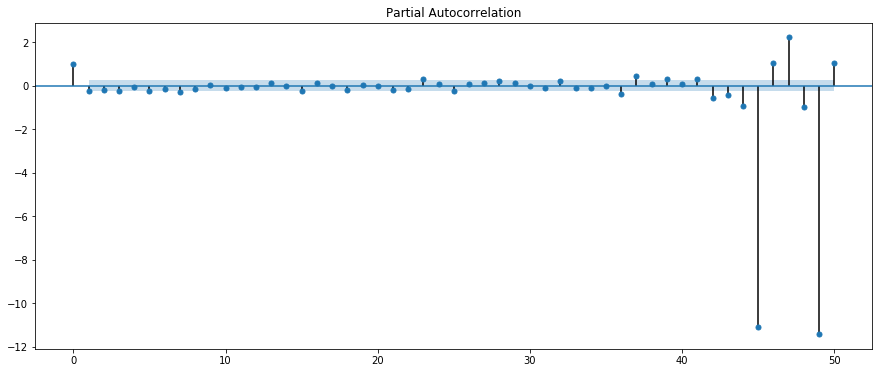

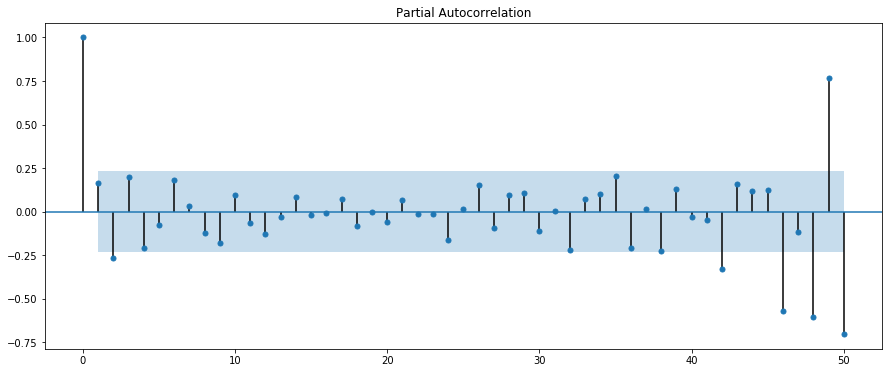

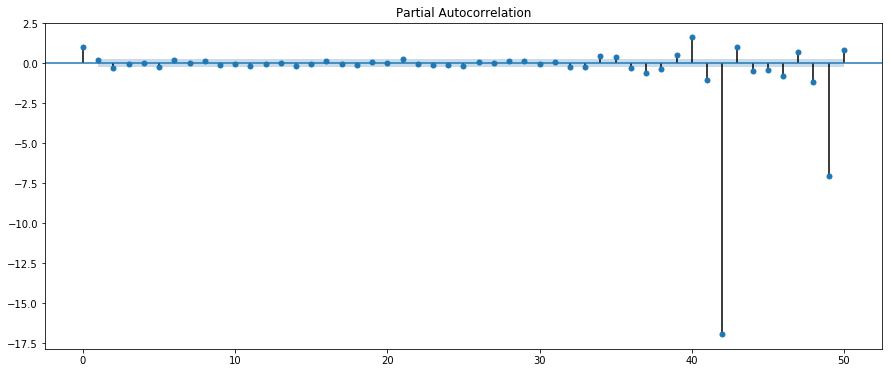

In [253]:
plot_pacf(fb_resids_close, lags=50)
plt.show()
plot_pacf(fb_resids_open, lags=50)
plt.show()
plot_pacf(fb_resids_volume, lags=50)
plt.show()
plot_pacf(fb_resids_high, lags=50)
plt.show()
plot_pacf(fb_resids_low, lags=50)
plt.show()

In [263]:
fb_returns = fb
fb_returns['6. return'] = fb_returns['4. close'] - fb_returns['1. open']
fb_returns = fb_returns.drop(['1. open', '2. high', '3. low','4. close', '5. volume'], axis =1)

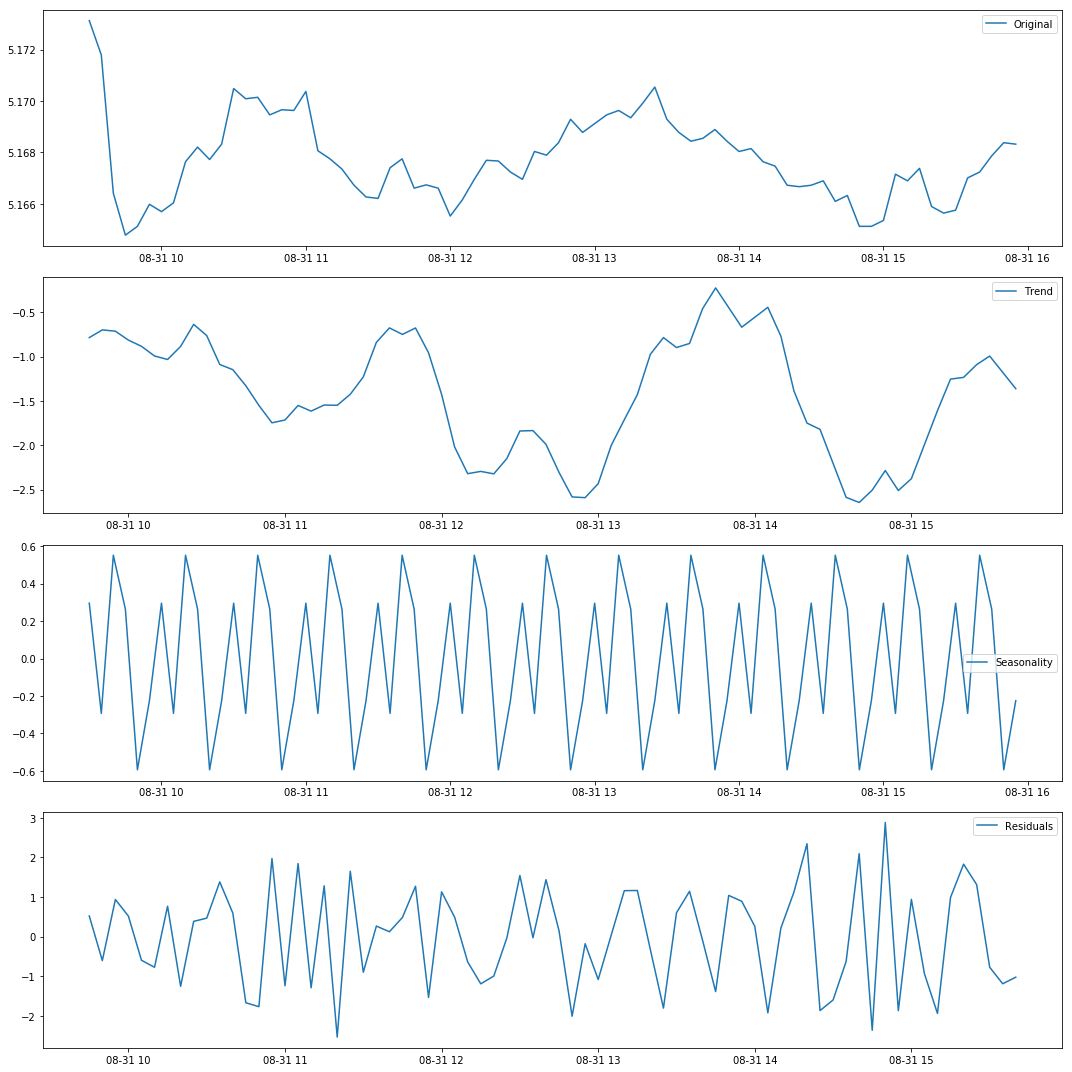

In [276]:
ts = pd.DataFrame(fb_returns['6. return'])
ts = ts['6. return'].astype(float)
ts_log_ret = np.log(ts)
ts_log_ret = ts_log_ret.fillna(0)

decomposition = seasonal_decompose(ts_log_ret, freq=6)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
rcParams['figure.figsize'] = 15, 15
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
fb_returns_resid = residual

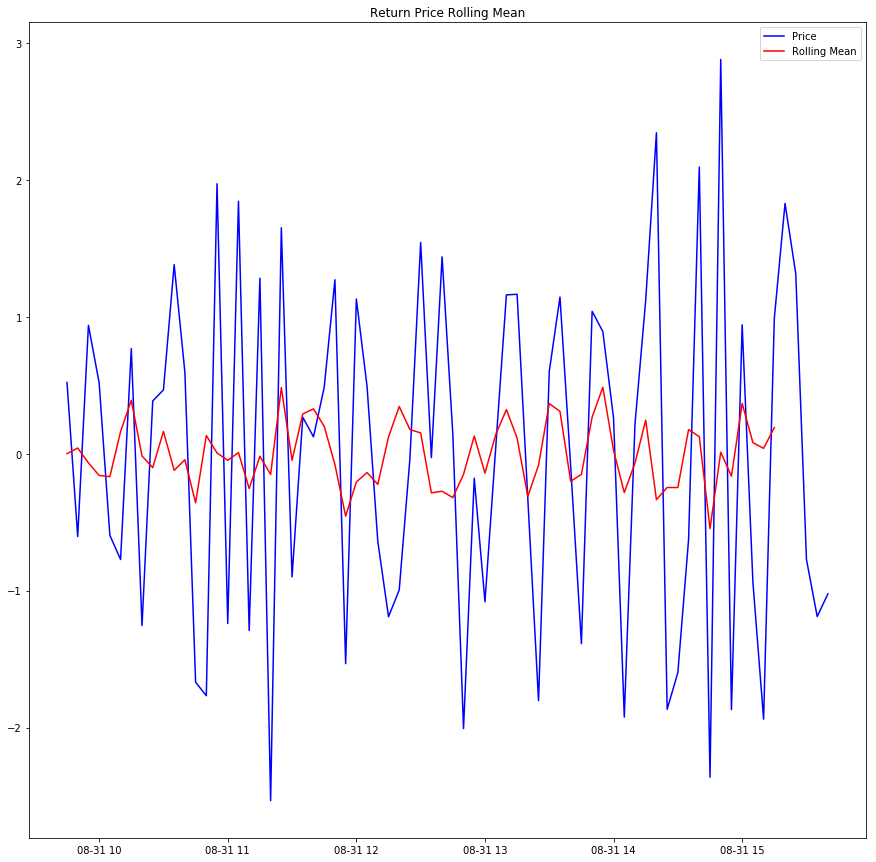

Dickey-Fuller Test for Return Price:
Test Statistic                -7.071854e+00
p-value                        4.913953e-10
#Lags Used                     6.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (1%)           -3.535217e+00
Critical Value (5%)           -2.907154e+00
Critical Value (10%)          -2.591103e+00
dtype: float64


In [277]:
fb_returns_resid.dropna(inplace=True)
fb_returns_resid = pd.DataFrame(fb_returns_resid)
check_stationarity(fb_returns_resid, '6. return')

In [284]:
import statsmodels.api as sm

In [298]:
fb.head(1)

1. open  2. high  3. low  4. close  5. volume  return  \
2018-08-31 15:55:00   175.74  175.765  175.62    175.72   605603.0   -0.02   

                     6. return  
2018-08-31 15:55:00      -0.02

In [433]:
fb_close = pd.DataFrame(fb['4. close'])
fb_close['4. close'] = fb_close['4. close'].astype(float)
# fb_open['1. open'] = np.log(fb_open['1. open'])

In [469]:
fb_returns = fb.drop('return', axis =1)
fb_returns = fb_returns.drop(['1. open', '2. high', '3. low','4. close', '5. volume'], axis =1)
fb_returns_log = fb_returns
fb_returns_log['6. return'] = np.log(fb_returns_log['6. return'])
fb_returns_log = fb_returns_log.fillna(0)
# fb_returns_log

In [470]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

In [471]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(fb_returns_log,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {}6 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 1, 1)
pdqs    (0, 1, 1, 6)
aic          247.666
Name: 27, dtype: object

In [483]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(fb_returns_log,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    307.125     -0.003      0.997    -602.953     600.954
ma.S.L4       -0.9364      0.181     -5.167      0.000      -1.292      -0.581
sigma2         2.5544    784.431      0.003      0.997   -1534.903    1540.012


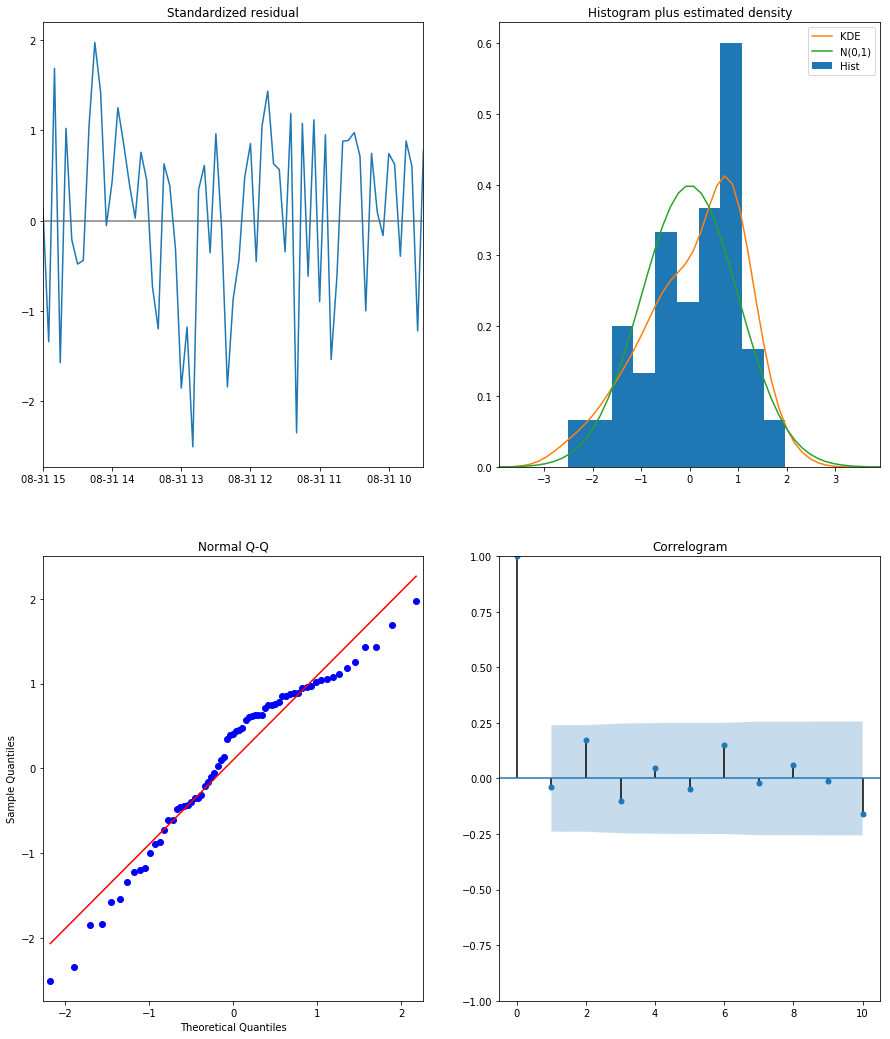

In [484]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [488]:
pred = output.get_prediction(start=pd.to_datetime('2018-08-31 15:25:00'), end=pd.to_datetime('2018-08-31 13:00:00'),dynamic=False)
pred_conf = pred.conf_int()

In [489]:
pred_conf

lower 6. return  upper 6. return
2018-08-31 15:25:00        -5.331414         6.806559
2018-08-31 15:20:00        -6.719690         3.792113
2018-08-31 15:15:00        -6.757843         3.152786
2018-08-31 15:10:00        -4.795008         5.038895
2018-08-31 15:05:00        -3.818477         5.069811
2018-08-31 15:00:00        -5.681358         2.798492
2018-08-31 14:55:00        -5.909938         2.341440
2018-08-31 14:50:00        -7.651096         0.572522
2018-08-31 14:45:00        -5.389667         2.524517
2018-08-31 14:40:00        -5.884572         1.846838
2018-08-31 14:35:00        -6.906271         0.704380
2018-08-31 14:30:00        -6.375680         1.220984
2018-08-31 14:25:00        -6.798752         0.646332
2018-08-31 14:20:00        -5.648861         1.693167
2018-08-31 14:15:00        -7.292781        -0.025392
2018-08-31 14:10:00        -6.270506         0.988649
2018-08-31 14:05:00        -6.145560         1.024214
2018-08-31 14:00:00        -4.340240         2.763628
2018-08-31 13:55:00        -5.780953         1.272302
2018-08-31 13:50:00        -5.056260         1.991694
2018-08-31 13:45:00        -5.565392         1.423885
2018-08-31 13:40:00        -3.523032         3.420617
2018-08-31 13:35:00        -4.789334         2.117815
2018-08-31 13:30:00        -4.242808         2.660730
2018-08-31 13:25:00        -4.963669         1.898554
2018-08-31 13:20:00        -3.225069         3.603796
2018-08-31 13:15:00        -4.493742         2.307624
2018-08-31 13:10:00        -4.074701         2.724112
2018-08-31 13:05:00        -5.089951         1.678305
2018-08-31 13:00:00        -3.401697         3.341184

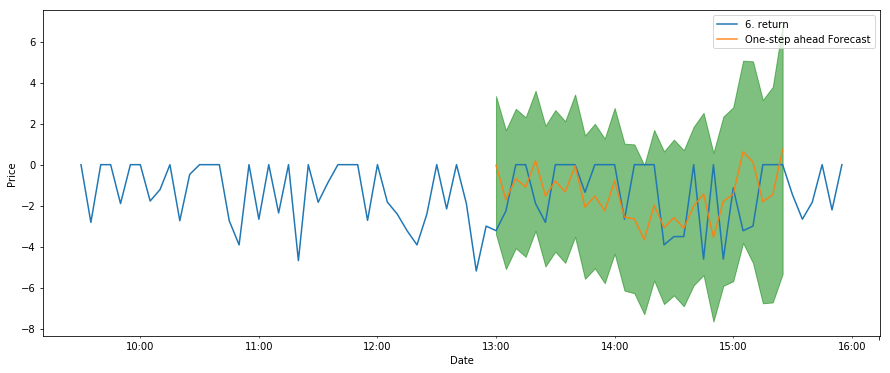

In [490]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = fb_returns_log.plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [492]:
fb_return_pred = pred.predicted_mean
fb_return_truth = fb_returns_log[(fb_returns_log.index > '2018-08-31 12:55:00') & (fb_returns_log.index < '2018-08-31 15:30:00')]

# Compute the mean square error
mse = ((fb_return_pred - fb_return_truth['6. return']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 4.01


In [442]:
fb_prediction_df['close_pred'] = fb_close_pred

In [444]:
fb_prediction_df.to_csv('fb_predictions.csv')

In [448]:
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime

# ts_close = pd.DataFrame(fb['4. close'])
# ts_close = ts_close['4. close'].astype(float)
# rolmean = ts_close.rolling(window=6).mean()
# orig_close = plt.plot(ts, color='blue',label='Original')
# mean_close = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)


layout = {'xaxis': {'rangeslider':{'visible':False}},
    'title': 'Facebook Stock 08-31-2018',
    'yaxis': {'title': 'Stock Price'},'shapes': [{
        'x0': '2018-08-31 14:00:00', 'x1': '2018-08-31 14:00:00',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],'annotations': [{
        'x': '2018-08-31 14:00:00', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Predictions Begin'
    }]}


trace = go.Candlestick(name = 'Actual Price',x=fb.index,
                       open=fb['1. open'],
                       high=fb['2. high'],
                       low=fb['3. low'],
                       close=fb['4. close'],
                       increasing=dict(line=dict(color= 'Blue')),
                       decreasing=dict(line=dict(color= 'Silver')))

trace2 = go.Candlestick(name = 'Predicted Price',x=fb_prediction_df.index,
                       open=fb_prediction_df.open_pred,
                       high=fb_prediction_df.high_pred,
                       low=fb_prediction_df.low_pred,
                       close=fb_prediction_df.close_pred,
                       increasing=dict(line=dict(color= 'Green')),
                       decreasing=dict(line=dict(color= 'Red')))


# trace2 = go.Scatter(name = 'Close Price MA',
#     x = rolmean.index,
#     y = rolmean.values, line = dict(
#         color = ('red'), o))

data = [trace,trace2]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='plot from API (15)')

In [494]:
fb_prediction_df['open_close'] = fb_prediction_df.close_pred - fb_prediction_df.open_pred

In [500]:
fb_prediction_df['prediction'] = fb_prediction_df.open_close > 0
fb_prediction_df['prediction'] = fb_prediction_df.prediction.replace(True,1)
fb_prediction_df['prediction'] = fb_prediction_df.prediction.replace(False,0)

In [502]:
fb_prediction_df.to_csv('fb_predictions.csv')

In [514]:
fb['verdict'] = fb['6. return'] > 0
fb['verdict'] = fb['verdict'].replace(True,1)
fb['verdict'] = fb['verdict'].replace(False,0)

In [518]:
fb_residuals = pd.DataFrame(fb['verdict'])

In [521]:
fb_residuals = fb_residuals[(fb_residuals.index > '2018-08-31 13:55:00') & (fb_residuals.index < '2018-08-31 15:50:00')]

In [524]:
fb_prediction_df = fb_prediction_df.join(fb_residuals)

In [526]:
fb_prediction_df['correct'] = fb_prediction_df.prediction - fb_prediction_df.verdict

In [534]:
accuracy = sum(fb_prediction_df.correct == 0) / len(list(fb_prediction_df.correct))

In [535]:
accuracy

0.5